# 01 - Introduction To Causality

## 연관관계가 인과관계가 될 때

예시와 함께 보자.

- 예: 학생들이 태블릿PC를 받은 학교와 그렇지 않은 학교의 학업성적을 비교

In [9]:
import pandas as pd
import numpy as np
from scipy.special import expit
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

#style.use("fivethirtyeight")

np.random.seed(123)
n = 100
tuition = np.random.normal(1000, 300, n).round()
tablet = np.random.binomial(1, expit((tuition - tuition.mean()) / tuition.std())).astype(bool)
enem_score = np.random.normal(200 - 50 * tablet + 0.7 * tuition, 200)
enem_score = (enem_score - enem_score.min()) / enem_score.max()
enem_score *= 1000

data = pd.DataFrame(dict(enem_score=enem_score, Tuition=tuition, Tablet=tablet))

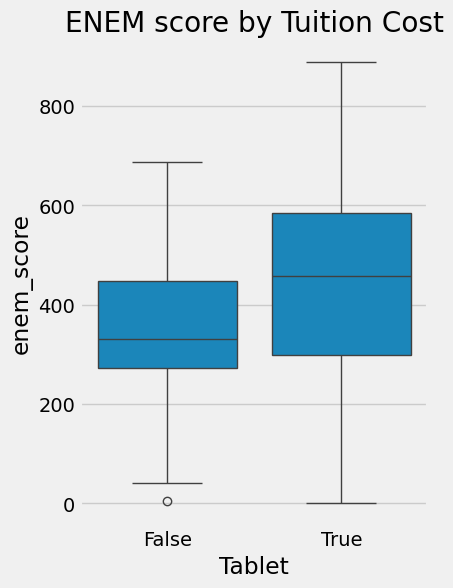

In [10]:
plt.figure(figsize=(4,6))
sns.boxplot(y="enem_score", x="Tablet", data = data).set_title('ENEM score by Tuition Cost')
plt.show()

**처치**(Treatment)

- $T_i$는 실험대상 i에 대한 처치(treatement)여부


$
T_i=\begin{cases}
1 \ \text{: 실험대상 i가 Treatment를 받은 경우}\\
0 \ \text{: 실험대상 i가 Treatment를 받지 않은 경우}\\
\end{cases}
$


- 여기서의 처치는 효과를 알고자 하는 일부 개입(intervention)을 나타내는데 사용하는 용어
- 예: 학생이 태블릿을 받은 여부

**결과**(outcome)

- 실험대상 i에 대해 관찰된 결과 변수(Outcome variable)를 $Y_i$라고 정의
- 인과추론에서는 처치가 결과에 영향을 미치는지를 알고자 함
- 단, 처치여부에 관계없이 같은 실험대상에 대해 동시에 관찰할 수 없는 **인과적 추론의 근본적인 문제**(Fundamental problem of causal inference) 존재
- 예: 학업성적

**잠재적 결과**(Potential Outcomes)

- 잠재적 결과는 실제로 일어나지 않았으나 발생할 수 있는 결과
- 처치를 받은 경우, **무슨 일이 일어났을지**를 나타냄
- 일어난 잠재적 결과를 사실(factual)이라고 부르고, 일어나지 않은 결과를 반사실(counterfactual)이라고 부름


- $Y_{0i}$ : 실험대상 i가 처치를 받지 않은 잠재적 결과를 의미

- $Y_{1i}$ : **같은 실험대상 i**가 처치를 받은 잠재적 결과를 의미

- $Y_{1i}$는 태블릿이 있는 학교의 학생 i의 성적
- 만약 학생 i가 태블릿을 받았다면, $Y_{1i}$를 관찰할 수 있고, 만약 태블릿을 받지 못한 경우는 $Y_{0i}$를 관찰 할 수 있음
- 태블릿을 받지 못한 경우, $Y_{1i}$가 여전히 정의되어 있지만 관측할 수 없음 --> 반사실적 잠재적 결과

잠재적 결과를 통해, 개별 처치 효과(ITE, Individual Treatment Effect)를 정의할 수 있게 된다.

$ITE = Y_{1i} - Y_{0i}$
 
- 이때, '인과추론의 근본적인 문제'로 인해 잠재적 결과 중 하나만 관찰할 수 있으며, ITE는 알 수 없음

따라서, 추정하기 더 쉬운 **평균 처치 효과** (ATE, Average Treatment Effect)를 (일단) 사용(해 보자..)

$ATE = E[Y_1 - Y_0]$

조금 더 추정하기 쉬운 **처치받은 그룹에 대한 평균 처치 효과**(ATET/ATT, average treatment effect on the treated)도 있다.

$ATT = E[Y_1 - Y_0 | T=1]$

In [6]:
# 모든 결과를 미리 볼 수 있다고 가정할 때

pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,800,700],
    y1=[450,600,600,750],
    t= [0,0,1,1],
    y= [500,600,600,750],
    te=[-50,0,-200,50],
))

,i,y0,y1,t,y,te
0,1,500,450,0,500,-50
1,2,600,600,0,600,0
2,3,800,600,1,600,-200
3,4,700,750,1,750,50


$ATE$는 개별 처치 효과(ITE)에 대한 평균

- $ATE=(-50 + 0 - 200 + 50)/4 = -50$

$ATT$는 $T=1$일 때 평균

- $ATT=(- 200 + 50)/2 = -75$

물론, 이런 결과(반사실)는 실제로는 결코 알 수 없음

In [7]:
#실제 보게 될 데이터

pd.DataFrame(dict(
    i= [1,2,3,4],
    y0=[500,600,np.nan,np.nan],
    y1=[np.nan,np.nan,600,750],
    t= [0,0,1,1],
    y= [500,600,600,750],
    te=[np.nan,np.nan,np.nan,np.nan],
))

,i,y0,y1,t,y,te
0,1,500.0,NaN,0,500,NaN
1,2,600.0,NaN,0,600,NaN
2,3,NaN,600.0,1,600,NaN
3,4,NaN,750.0,1,750,NaN


이 때, ATE를 계산
- $ATE=(600+750)/2 - (500 + 600)/2 = 125$ 

- 결과는 매우 다름!

- 이는 연관성을 인과관계로 착각하는 오류임

## 편향

실제로 반사실은 관찰할 수 없으나, 추론은 할 수 있다.
 
- 반사실을 추론하기 위한 경우 도메인 지식 등을 활용하여 더 합리적인 추론 가능
- 처치(태블릿)를 받은 학교의 $Y_0$가 처치를 받지 않은 학교의 $Y_0$보다 더 크다고 추론 가능
- 즉, 학생들에게 태블릿을 제공할 수 있는 학교는 더 높은 시험 점수에 영향을 주는 다른 요인들도 존재할 수 있음(예, 더 부유한 동네의 학교)

**편향**
- 편향(Bias)는 연관성과 인과관계의 차이점

연관성은 $E[Y|T=1] - E[Y|T=0]$로 측정하나, 반면 인과관계는 $E[Y_1 - Y_0]$로 측정한다.

식을 통해 알아보자.

$
E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0]
$

$
E[Y|T=1] - E[Y|T=0] = E[Y_1|T=1] - E[Y_0|T=0] + E[Y_0|T=1] - E[Y_0|T=1]
$


$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATT} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

연관성은 처치에 대한 처치 효과(ATT)에 bias를 더한 것과 같다!

**편향은 실험군과 대조군이 처치를 받지 않은 경우, 처치 전에 실험군과 대조군이 어떻게 다른지를 나타낸다.** 

- 예시에서 $E[Y_0|T=0] < E[Y_0|T=1]$이며, **태블릿 제공 여부와 무관**하게 학생들에게 태블릿을 줄 수 있는 학교가 그렇지 않은 학교보다 성적이 높음

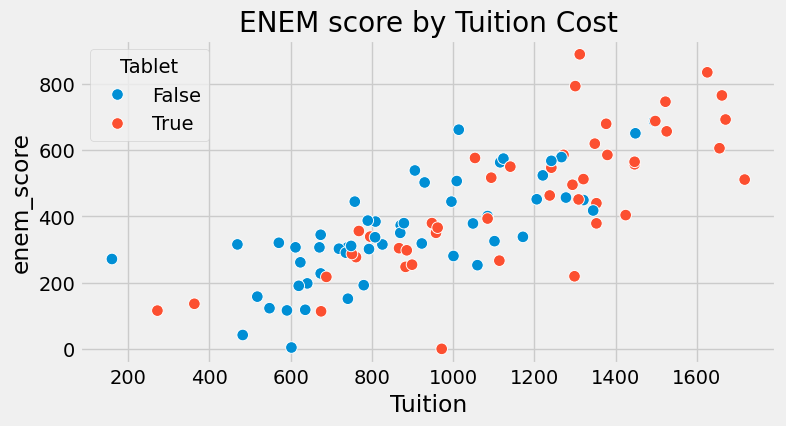

In [12]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="Tuition", y="enem_score", hue="Tablet", data=data, s=70).set_title('ENEM score by Tuition Cost')
plt.show()

**$E[Y_0|T=0] = E[Y_0|T=1]$이면 연관관계는 인과관계와 같다.** 

여기에는 강한 직관적인 주장이 있는데요. $E[Y_0|T=0] = E[Y_0|T=1]$는 실험군과 대조군이 비교 가능하다는 것을 의미해요.

또는 실험군이 처치를 받지 않았을 때 $Y_0$를 관찰할 수 있다면, 그 결과는 처치를 받지 않은 것과 같을 것입니다. 결과적으로 bias 항은 사라질 거에요.

$
E[Y|T=1] - E[Y|T=0] = E[Y_1 - Y_0|T=1] = ATT
$
또한 처치받은 그룹과 처치받지 않은 그룹이 처치 자체에서만 다른 경우, $E[Y_0|T=0] = E[Y_0|T=1]$이고 처치를 받은 그룹에 대한 인과효과는 처치를 받지 않은 그룹과 같습니다(두 그룹이 매우 유사하기 때문이에요).

$
\begin{align}
E[Y_1 - Y_0|T=1] &= E[Y_1|T=1] - E[Y_0|T=1] \\
&= E[Y_1|T=1] - E[Y_0|T=0] \\
&= E[Y|T=1] - E[Y|T=0]
\end{align}
$

위와 같이, 비교가능한 그룹일 경우 **두 집단의 평균차이가 인과효과**가 됩니다.  

$
E[Y|T=1] - E[Y|T=0] = ATT
$

위에서 언급한 내용과 비슷하게, 처치된 그룹과 처치되지 않은 그룹이 처치에서만 다른 경우 $E[Y_1|T=0] = E[Y_1|T=1]$로도 표현할 수 있습니다. 실험군과 대조군이 모두 처치에 유사하게 반응하는지 확인해야합니다. 이제 처치 전 교환가능(exchangeable, 비교가능)하며, **처치 후에도** 실험군과 대조군이 교환 가능해요. 해당 경우는 이렇게 표현될 수 있습니다. $E[Y_1 - Y_0|T=1]=E[Y_1 - Y_0|T=0]$ 및
 
$
E[Y|T=1] - E[Y|T=0] = ATT = ATE
$

해당 과정은 정말 중요해서, 아래 그림과 함께 다시 한 번 짚어보고 가겠습니다. 실험군과 대조군을 단순 평균을 비교하면 이것이 우리가 얻은 것입니다(파란색 점 - 처치받지 않은 그룹).

![img](./data/img/intro/anatomy1.png)

두 그룹 간의 결과 차이가 어떻게 두 가지 원인을 가질 수 있는지 주목해주세요.

1. 처치 효과. 시험 점수의 증가는 학생들에게 태블릿을 제공함으로써 발생합니다.
2. 시험 점수의 일부 차이는 더 나은 교육을 위한 등록금 때문일 수 있습니다. 이 경우, 처치받은 학생들의 수업료가 훨씬 더 비싸기 때문에 실험군과 대조군에서 차이가 생깁니다. 즉, 처치받은 그룹과 받지 않은 그룹의 차이는 처치 자체가 아니게 됩니다.

ITE는 동일한 실험 대상에 대한 결과와 다른 대안의 처치를 받았을 경우 얻을 수 있는 이론적 결과 간의 차이입니다. 실제 처치 효과는 아래 왼쪽 그림과 같이 잠재적 결과를 관찰할 수 있는 신과 같은 힘이 있어야만 얻을 수 있습니다. 이는 반사실 결과이며 밝은 색으로 표시됩니다.

![img](./data/img/intro/anatomy2.png)

오른쪽 그래프에서, 이전에 다룬 편향을 나타냈습니다. 실험에 참가한 모든 대상이 처치를 받지 않는다면, 편향이 생깁니다. 이 경우 $T_0$ 잠재적 결과만 남게 됩니다. 그런 다음 처치된 그룹과 처치되지 않은 그룹이 어떻게 다른지 확인합니다. 만약 그렇다면, 처치 이외의 다른 요인이 실험군과 대조군을 다르게 만드는 원인이 될거에요. 이것이 바로 편향이며, 처치에 대한 실질적인 효과를 실제 처치 효과를 가리게 됩니다.

이제 bias 없는 가상의 상황과 대조해보도록 합시다. 태블릿이 학교에 무작위로 할당되었다고 가정한다면, 부유한 학교와 가난한 학교가 태블릿을 받을 기회는 동일합니다. 즉, 처치인 태블릿 제공 여부는 등록금 전반에 걸쳐서 고르게 분배될 거에요.

![img](./data/img/intro/anatomy3.png)

이 경우에는 처치를 받은 그룹과 받지 않은 그룹의 차이는 차이는 평균 인과 효과에 해당합니다. 그 이유는 처치 이외에 처치받은 그룹과 받지않은 그룹 사이에 차이의 다른 원인이 없기 때문이에요. 실험에서의 모든 차이점은 그에 기인해야 합니다. 즉, 이런 경우는 편향이 없습니다.

![img](./data/img/intro/anatomy4.png)

$Y_0$s만 관찰하도록 모든 실험대상이 처치를 받지 않도록 설계하면, 실험군과 대조군 간의 차이가 존재하지 않을 것입니다.

바로 이 부분이 바로 인과추론에 있어서 정말 힘든 부분이라고 할 수 있습니다. 편향을 제거하고 실험군과 대조군을 비교가능하게 하는 현명한 방법을 찾아서, 모든 차이가 평균적인 처치 효과(ATE)만으로 추정할 수 있게끔 하는 것이죠. 궁극적으로 인과추론은 모든 망상과 오해를 걷어내고, 세상이 어떻게 작동하는지 알아내는 것이라고 할 수 있습니다. 이제 편향을 제거하는 방법을 배워서 인과효과를 식별할 수 있게 됩니다.


## References

- [해당 원서](https://github.com/matheusfacure/python-causality-handbook)
- [한국어 번역 자료](https://github.com/CausalInferenceLab/Causal-Inference-with-Python)
